This proejct is to detect fraudulent transactions in credit card dataset. In order to do that, 2 unsupervised models like
Isolation Forest and Local Outlier Factor(LOF) and 1 supervised model, Gradient Boosting model will be used.
The performance of the models will be evaluated by precision, recall and Area Under Precision-Recall Curve.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import xgboost as xgb

Loading the data file from Kaggle. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
# Loading the data
credit_data = pd.read_csv('creditcard.csv')
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Time = Seconds elapsed between a transaction and the first transaction,
V1 ~ V28 = Result of PCA transformation,
Amount = Transaction amount,
Class = 0 is legit transaction and 1 is fraudulent transation.

Due to the confidentiality of credit card users, only the PCA transformation result is available.
The values are abstract but captured patterns and variations of the original features that we do not know.

In [3]:
#Checking NULL value
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It seems like there is no missing value.

Let's dive into exploratory data analysis(EDA).

First thing I want to check is distributions.

Class
0    284315
1       492
Name: count, dtype: int64


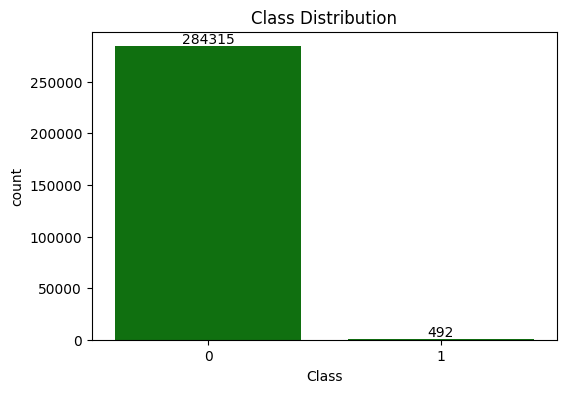

In [4]:
#Distribution of 'Class'.
class_count = credit_data['Class'].value_counts()
print(class_count)

plt.figure(figsize=(6,4))
histogram1 = sns.countplot(x='Class', data=credit_data, color='green')
for i, class_count in enumerate(class_count):
    histogram1.text(i, class_count, str(class_count), ha='center', va='bottom')


plt.title('Class Distribution')
plt.show()

Class 0: legit cases & Class 1: fraud cases.

It looks like this data is imbalanced; fraud cases(492) are way less than the legit cases(284,315).
I am glad that there are way less fraud cases than legit cases!

The percentage of fraud cases is 0.17%.

Second distribution I want to check is transaction amount by legit cases and fraud cases.

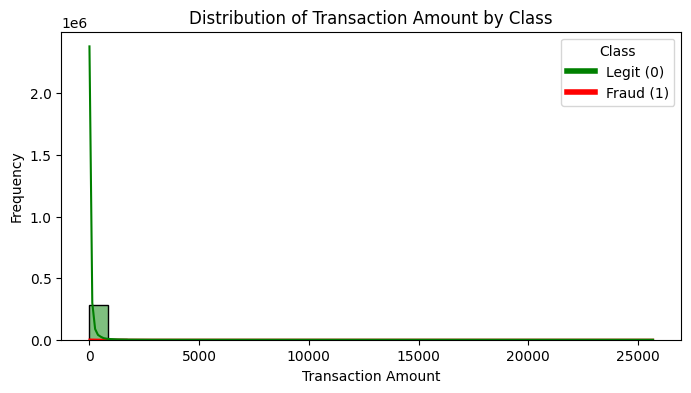

In [5]:
#Distribution of 'Amount' by 'Class'

plt.figure(figsize=(8,4))
histogram2= sns.histplot(data=credit_data, x='Amount', hue='Class', multiple='stack', bins=30, 
             palette={0: 'green', 1: 'red'}, kde=True)

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount by Class')
handles = [plt.Line2D([0], [0], color='green', lw=4, label='Legit (0)'),
           plt.Line2D([0], [0], color='red', lw=4, label='Fraud (1)')]
plt.legend(handles=handles, title='Class')
plt.show()

Due to the huge difference between the legit and fraud cases. It is impossible to see the fraud cases's
transaction distribution and also can't see if there are any cases greater than 5000 transaction amount.

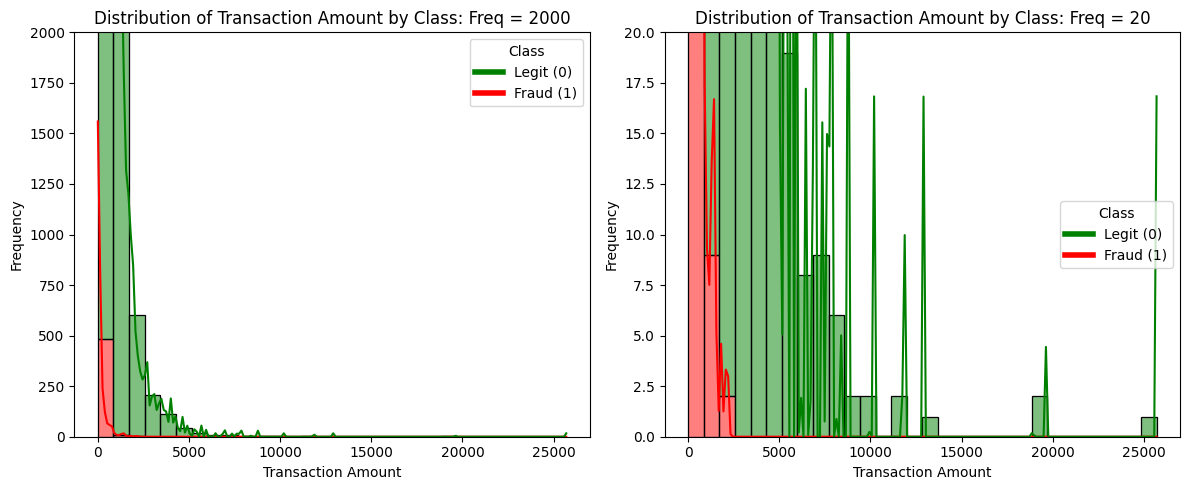

In [6]:
#Distribution of 'Amount' by 'Class'- Zooming in
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Left Plot
sns.histplot(data=credit_data, x='Amount', hue='Class', multiple='stack', bins=30, 
             palette={0: 'green', 1: 'red'}, kde=True, ax=axs[0])

axs[0].set_xlabel('Transaction Amount')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Transaction Amount by Class: Freq = 2000')
handles = [plt.Line2D([0], [0], color='green', lw=4, label='Legit (0)'),
           plt.Line2D([0], [0], color='red', lw=4, label='Fraud (1)')]
axs[0].set_ylim(0, 2000)
axs[0].legend(handles=handles, title='Class')

# Right Plot
sns.histplot(data=credit_data, x='Amount', hue='Class', multiple='stack', bins=30, 
             palette={0: 'green', 1: 'red'}, kde=True, ax=axs[1])

axs[1].set_xlabel('Transaction Amount')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Transaction Amount by Class: Freq = 20')
axs[1].set_ylim(0, 20) 
axs[1].legend(handles=handles, title='Class')


plt.tight_layout() 
plt.show()

Same distribution plot that we just saw above but theses are zoomed in plots to see the frequency
of fraud cases better and also the cases greater than 5000 transaction amount.

Most of the fraud cases are less than 2000 transaction amount. I am suprised that all of the expensive transactions are
legit not fraud. I expected some fraud cases on crazy amount of transaction amount, but it is not true.

Last distribution I want to explore is transaction time by legit and fraud cases.
I am curious if there is any pattern or trend in time.

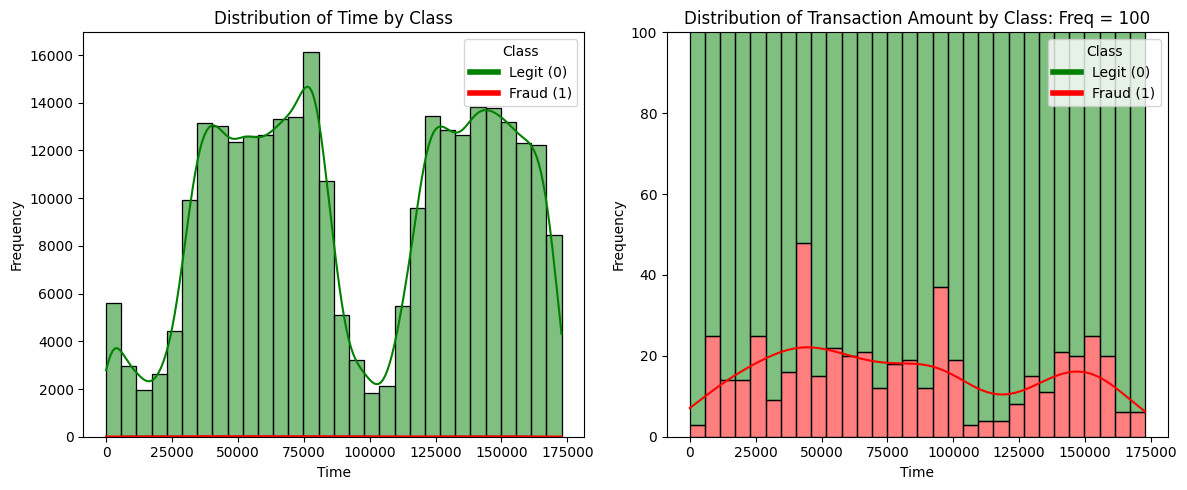

In [7]:
#Distribution of 'Time' by 'Class'
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Left Plot
sns.histplot(data=credit_data, x='Time', hue='Class', multiple='stack', bins=30, 
             palette={0: 'green', 1: 'red'}, kde=True, ax=axs[0])

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Time by Class')
handles = [plt.Line2D([0], [0], color='green', lw=4, label='Legit (0)'),
           plt.Line2D([0], [0], color='red', lw=4, label='Fraud (1)')]
axs[0].legend(handles=handles, title='Class')

# Right Plot
sns.histplot(data=credit_data, x='Time', hue='Class', multiple='stack', bins=30, 
             palette={0: 'green', 1: 'red'}, kde=True, ax=axs[1])

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Transaction Amount by Class: Freq = 100')
axs[1].set_ylim(0, 100) 
axs[1].legend(handles=handles, title='Class')


plt.tight_layout() 
plt.show()

Time is in seconds and it's elapsed time between a transaction and the first transaction.

I do not see any noticeable patterns or trends of fraud cases on certain range of time, but it seems like
it's less likely to have fraud cases within 600 seconds(10 min) from the frist transaction and most of the fraud happeneds
within 100,600 seconds(28 hours). This is very interesting. 

Next EDA I want to do is relationship between time and transaction amount of fraud cases.

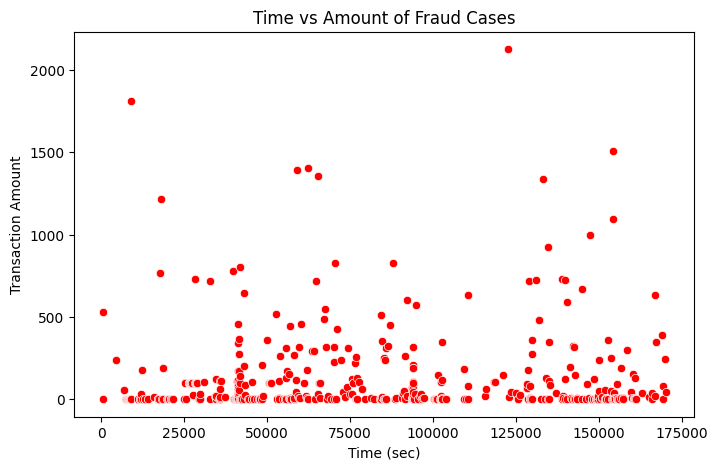

In [8]:
# 'Time' vs 'Amount' of fraud cases
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Time', y = 'Amount', data= credit_data[credit_data['Class'] == 1], color= 'red')
plt.xlabel('Time (sec)')
plt.ylabel('Transaction Amount')
plt.title('Time vs Amount of Fraud Cases')
plt.show()

Most of the fraud cases are less than 1000 transaction amount and only a few over 1000.

Last EDA I want to do is checking correlation between features. So far, with all the distribution histograms
and scatterplot that we just saw, I could not find any patterns or relationship between features.
I wonder if the heatmap will show us anything.

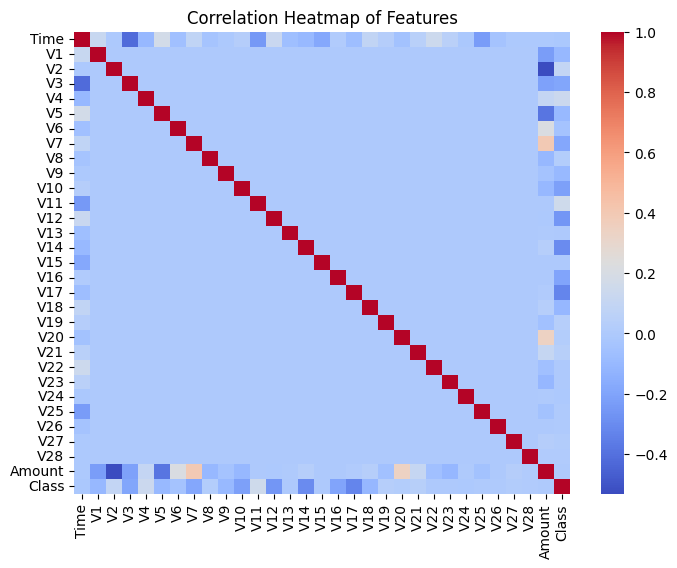

In [9]:
#Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(credit_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

Like I mentioned earlier, there is no correlation between time and class, amount and time, amount and class.
I do see some correlation between certain transaction such as v7 slgihtly correlated with amount.
I wonder what that means.

Before I start on building models, I want to scale the features because I want the unsupervised and supervised models to treat them equally. After scaling the features, I am going to split the data into train and test data sets.

In [10]:
#Scaling Features
scaler = StandardScaler()

X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

X_scaled = scaler.fit_transform(X)

#Spltting Data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

There are going to be 3 models I am going to build for this project.

First one is unsupervised model and it's called Isolation Forest, which is specifically designed for anomaly detection problems.
This model isolates anomalies instead of profiling normal data points, so it's very effective for identifying
anomalies like fraud in this case.

In [11]:
#Isolation Forest
iso_forest_model = IsolationForest(contamination= 0.002, random_state=42)
iso_forest_model.fit(X_train)
iso_prediction =iso_forest_model.predict(X_train)

I set the contamination at 0.002 because the percentage of the fraud cases out of the total cases was 0.17%.

The predictions of Isolation Forest model are -1 for anomalies and 1 for normal data points.
It's different from the current data I am using, so let's covert the numbers. -1 to 1 and 1 to 0.

In [12]:
#Converting predictions
iso_prediction = [1 if x == -1 else 0 for x in iso_prediction]

Like we saw earlier in this project, the data is imbalanced; way less fraud cases, so accuracy score or
confusion matrix is not recommeneded. Accuracy can be misleading in an imbalanced data by predicting the majotiry
class most of the time.

In this case, precision, recall and area under the precision-recall curve(AUPRC) are suitable evaluation metrics.
Precision measures the accuracy of positive predictions, which is fraud case. Recall measures the ability to find all
fraud cases. AUPRC visualizes the performance of a model on the fraud cases.

In [13]:
#Classification Report
print(classification_report(y_train,iso_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.29      0.34      0.31       394

    accuracy                           1.00    227845
   macro avg       0.65      0.67      0.66    227845
weighted avg       1.00      1.00      1.00    227845



1.00 of legit case's precision means that whatever the model predicted as legit cases, they are 100% correct. 
1.00 of legit case's recall means that the model correctly identified 100% of actual legit cases.

0.29 of fraud cases's precision means that 29% of the cases were predicted as fraudulent and they were correct.
0.34 of fraud cases's recall means that the model correctly identified 34% of actual fraud cases. This is not good.

Let's check out the Area Under the Precision-Recall Curve.

In [14]:
#AUPRC
y_score = iso_forest_model.decision_function(X_train)
precision, recall, _=precision_recall_curve(y_train, y_score)
pr_auc = auc(recall, precision)
print("Area Under Precision-Recall Curve: ", pr_auc)

Area Under Precision-Recall Curve:  0.000874196782222364


AUPRC result ranges from 0 to 1. Getting close to 1 indicates the model has a good balance between precision and recall,
but the result is way too low which means the model's performance in distinguishing between the legit and fraud cases is
very poor. I was going to plot the curve but since it's too low, there is no point of visualzing the result.

In order to improve the performance of Isolation Forest model, I need to do some work on balancing the data set.
But, I am going to try out another unsupervised model which is called Local Outlier Factor(LOF).
LOF is particularly suited for scenarios where outliers(fraud cases) are rare compared to the majority class.

LOF model has n_neighbors as its parameter. It's basically the number of neighboring data points to consider when
assessing the local density of a given point. I do not know which will be the best n_neighbors so let's try out some values.

In [15]:
#Local Outlier Factor(LOF)
n_neighbors = [5, 10, 20, 50]

for x in n_neighbors:
    lof_model = LocalOutlierFactor(n_neighbors=x)
    lof_prediction = lof_model.fit_predict(X_train)
    lof_prediction = [1 if x== -1 else 0 for x in lof_prediction]
    print(f'n_neighbor: {x}, \n Result: \n{classification_report(y_train,lof_prediction)}')

n_neighbor: 5, 
 Result: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    227451
           1       0.00      0.12      0.01       394

    accuracy                           0.92    227845
   macro avg       0.50      0.52      0.48    227845
weighted avg       1.00      0.92      0.96    227845

n_neighbor: 10, 
 Result: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    227451
           1       0.00      0.12      0.01       394

    accuracy                           0.93    227845
   macro avg       0.50      0.53      0.49    227845
weighted avg       1.00      0.93      0.96    227845

n_neighbor: 20, 
 Result: 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    227451
           1       0.00      0.12      0.01       394

    accuracy                           0.94    227845
   macro avg       0.50      0.53      0.49    2

It looks like the result plateued after n_neighbor = 10, so I am choosing that model as my LOF model.



In [16]:
#AUPRC
lof_model = LocalOutlierFactor(n_neighbors=10)
lof_prediction = lof_model.fit_predict(X_train)
lof_prediction = [1 if x== -1 else 0 for x in lof_prediction]

y_score_lof = -lof_model.negative_outlier_factor_ 
precision, recall, _=precision_recall_curve(y_train, y_score_lof)
pr_auc_lof = auc(recall, precision)
print("Area Under Precision-Recall Curve: ", pr_auc_lof)

Area Under Precision-Recall Curve:  0.0020648059268028127


Comparing to Isolation Forest AUPRC result, LOF improved more than 2 times but still very low.
This still means that the model is struggling to effectively distinguish between the legit and fraud cases.
It is all because of the imbalance of the data set.

Last model I want to try is a supervised model which is called Gradient Boosting. This model can handle class imbalance
better than other models because it focuses on the mistakes from the previous model and create new models from the mistakes.

/Users/jihyekim/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Area Under Precision-Recall Curve:  0.8776143513157532


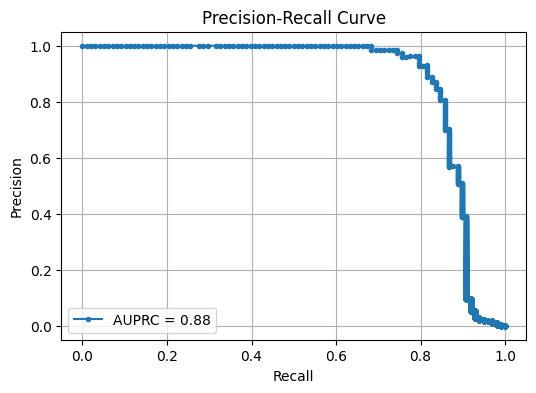

In [17]:
#XGBoost Model
xgboost_model = xgb.XGBClassifier(eval_metric='auc',use_label_encoder=False )
xgboost_model.fit(X_train, y_train)
xgboost_prediction = xgboost_model.predict(X_test)
xgboost_prediction_proba = xgboost_model.predict_proba(X_test)[:,1]

print(classification_report(y_test,xgboost_prediction))

precision, recall, _= precision_recall_curve(y_test, xgboost_prediction_proba)
pr_auc_xgb = auc(recall, precision)

print("Area Under Precision-Recall Curve: ", pr_auc_xgb)

#AUPRC Plot
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {pr_auc_xgb:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

Since supervised models like GradientBoosting model are trained by features AND labeled values, the AUPRC result is
much higher than other 2 unsupervised models which are only trained by features. This result was expected.

Let's downsample the majority class and retrain the model to see if this solve the problem.

In [18]:
#Downsampling Legit Cases
majority_class = credit_data[credit_data['Class'] == 0]
minority_class = credit_data[credit_data['Class'] == 1]

majority_downsampled = majority_class.sample(len(minority_class), random_state=42)
downsampled_data = pd.concat([majority_downsampled, minority_class])
downsampled_data = downsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

X2 = downsampled_data.drop('Class', axis=1)
y2 = downsampled_data['Class']

#Scaling features
X_scaled2 = scaler.fit_transform(X2)

#Splitting the Downsampled Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.2, random_state=42)

The downsampled data is ready for the unsupervised models.

In [19]:
#Isolation Forest with Downsampled Data
iso_forest_model.fit(X_train2)
iso_prediction2 =iso_forest_model.predict(X_train2)
iso_prediction2 = [1 if x == -1 else 0 for x in iso_prediction2]

print(classification_report(y_train2,iso_prediction2))

y_score_iso2 = iso_forest_model.decision_function(X_train2)
precision_iso2, recall_iso2, _=precision_recall_curve(y_train2, y_score_iso2)
pr_auc_iso2 = auc(recall_iso2, precision_iso2)
print("Area Under Precision-Recall Curve: ", pr_auc_iso2)

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       382
           1       1.00      0.00      0.01       405

    accuracy                           0.49       787
   macro avg       0.74      0.50      0.33       787
weighted avg       0.75      0.49      0.32       787

Area Under Precision-Recall Curve:  0.3427498048826262


See below for the original result that I got with the original imbalanced data set.

In [20]:
#Isolation Forest Original Result
print(classification_report(y_train,iso_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.29      0.34      0.31       394

    accuracy                           1.00    227845
   macro avg       0.65      0.67      0.66    227845
weighted avg       1.00      1.00      1.00    227845



Detecting the fraud cases improved but detecting legit cases worsened. This is precision-recall trade off.
Because of the trade-off, the result of AUPRC is still pretty low, 0.34.

One last hope for the unsupervised model gang.
Let's try out LOF.

In [21]:
#LOF
lof_prediction2 = lof_model.fit_predict(X_train2)
lof_prediction2 = [1 if x== -1 else 0 for x in lof_prediction2]

print(classification_report(y_train2,lof_prediction2))

y_score_lof2 = -lof_model.negative_outlier_factor_ 
precision_lof2, recall_lof2, _=precision_recall_curve(y_train2, y_score_lof2)
pr_auc_lof2 = auc(recall_lof2, precision_lof2)
print("Area Under Precision-Recall Curve: ", pr_auc_lof2)

              precision    recall  f1-score   support

           0       0.50      0.95      0.65       382
           1       0.65      0.09      0.15       405

    accuracy                           0.51       787
   macro avg       0.57      0.52      0.40       787
weighted avg       0.57      0.51      0.39       787

Area Under Precision-Recall Curve:  0.532848487016372


In [22]:
#LOF Original Result
print(classification_report(y_train,lof_prediction))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    227451
           1       0.00      0.12      0.01       394

    accuracy                           0.93    227845
   macro avg       0.50      0.53      0.49    227845
weighted avg       1.00      0.93      0.96    227845



Just like Isolation Forest, LOF also improved compared to the original result on detecting the fraud
but it got worse on detecting legit cases. The precision-recall trade off presents here, too.
AUPRC is much greater than before and also greater than Isolation Forest but still 0.53.

Conclusion

In this project focused on credit card fraud detection, I aimed to develop robust machine learning models capable of accurately identifying fraudulent transactions within a highly imbalanced dataset. Throughout the analysis, I encountered significant challenges due to the class imbalance, with fraudulent cases representing a small fraction of the total transactions.

Given the imbalanced nature of the dataset, I initially chose unsupervised models such as Isolation Forest and Local Outlier Factor (LOF), which are designed to handle such situations. However, these methods performed poorly in identifying fraudulent transactions. To address this issue, I downsampled the majority class to balance the dataset, resulting in improved model performance, though further enhancements were still necessary.

Next, I implemented a supervised model using Gradient Boosting. Training this model with labeled data and relevant features led to a significant performance improvement compared to the unsupervised methods.

Overall, the project highlighted the complexities of working with imbalanced data and demonstrated the effectiveness of downsampling the majority class. Future efforts will focus on employing new techniques such as SMOTE (Synthetic Minority Over-sampling Technique), oversampling the minority class, and data augmentation to enhance the representation of fraudulent transactions. Additionally, I will refine the model further to improve detection accuracy and better balance precision and recall. By incorporating these strategies, I want to create a more robust fraud detection system.